In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os

In [11]:
os.system("ls -lrt /data/jmsardain/CalibPU/trainings/pu/ckpts/") 

total 0
drwxrwsr-x. 2 jmsardain users  52 Jan 28 06:34 Jan272026
drwxrwsr-x. 2 jmsardain users   2 Jan 29 00:44 Jan282026
drwxrwsr-x. 2 jmsardain users   2 Jan 29 16:29 Jan292026
drwxrwsr-x. 2 jmsardain users   3 Feb  3 16:03 Jan302026
drwxrwsr-x. 2 jmsardain users   5 Feb  3 18:43 Feb32026
drwxrwsr-x. 2 jmsardain users  54 Feb  5 17:51 Feb42026
drwxrwsr-x. 2 jmsardain users 104 Feb  6 17:57 Feb52026


0

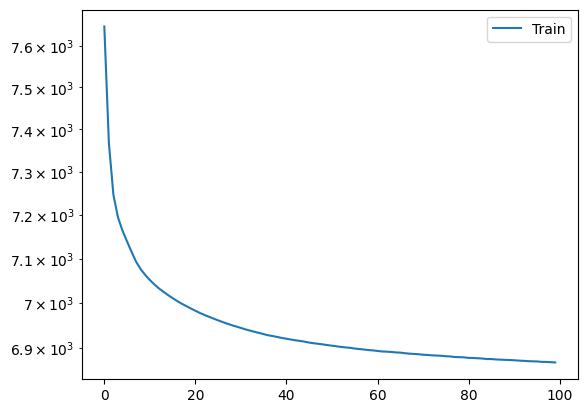

In [32]:
# df = pd.read_csv('/data/jmsardain/CalibPU/trainings/pu/ckpts/Jan272026/metrics.csv') 
# df = pd.read_csv('/data/jmsardain/CalibPU/trainings/pu/ckpts/Jan282026/metrics.csv') 
# df = pd.read_csv('/data/jmsardain/CalibPU/trainings/pu/ckpts/Feb42026/metrics.csv') 
df = pd.read_csv('/data/jmsardain/CalibPU/trainings/pu/ckpts/Feb52026/metrics.csv') 

plt.plot(df.Train_Loss, label='Train')
# plt.plot(df.Val_Loss, label='Val')
plt.yscale('log')
plt.legend()

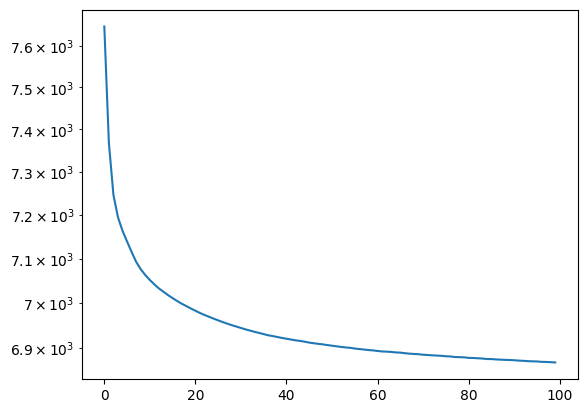

In [33]:
import numpy as np 
a = np.load('/data/jmsardain/CalibPU/trainings/pu/ckpts/Feb52026/total_predictions_only.npy')

In [34]:
labels = a[:, 2]
scores = a[:, 3]

scores_label1 = scores[labels == 1]
scores_label0 = scores[labels == 0]


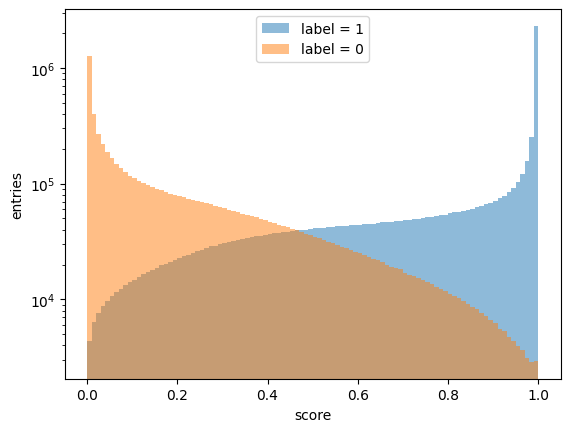

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(scores_label1, bins=100, alpha=0.5, label="label = 1")
plt.hist(scores_label0, bins=100, alpha=0.5, label="label = 0")
plt.legend()
plt.xlabel("score")
plt.ylabel("entries")
plt.yscale('log')
plt.show()


In [28]:
import glob as glob 
import pandas as pd 
import numpy as np
files  = glob.glob('/data/jmsardain/CalibPU/datasets/pu/train_pu_batch_0.npy')
for ifile in range(1, 200):
    files += glob.glob('/data/jmsardain/CalibPU/datasets/pu/train_pu_batch_'+str(ifile)+'.npy')

In [29]:
train_dataset = [np.load(f, mmap_mode='r') for f in files]

In [30]:
columns = ["labels",
                    "eventNumber", "jetCnt",
                    "clusterE",
                    "clusterEta",
                    "cluster_time",
                    "cluster_CENTER_LAMBDA", "cluster_CENTER_MAG", "cluster_ENG_FRAC_EM_INCL",
                    "cluster_FIRST_ENG_DENS", "cluster_LATERAL", "cluster_LONGITUDINAL",
                    "cluster_PTD", "cluster_ISOLATION", "cluster_SECOND_TIME", "cluster_SIGNIFICANCE",
                    "nPrimVtx", "avgMu",
                    "clusterPhi", "diffEta",
                    "zT", "zL", "zRel",
                    "cluster_nCells", "jetRawE",
                  ]

In [31]:
df = pd.DataFrame(np.concatenate(train_dataset), columns=columns)

In [32]:
df

,labels,eventNumber,jetCnt,clusterE,clusterEta,cluster_time,cluster_CENTER_LAMBDA,cluster_CENTER_MAG,cluster_ENG_FRAC_EM_INCL,cluster_FIRST_ENG_DENS,...,cluster_SIGNIFICANCE,nPrimVtx,avgMu,clusterPhi,diffEta,zT,zL,zRel,cluster_nCells,jetRawE
0,0.0,46002642.0,1.0,3.556606,1.510319,5.097156,235.124908,3903.294189,0.000000,8.823912e-06,...,2.494832,17.0,23.500002,1.811098,0.001314,0.289336,0.298834,0.010705,1.0,12.153590
1,1.0,46002642.0,1.0,2.726765,1.452857,1.079794,111.482292,3505.745361,0.599973,1.096617e-06,...,7.714689,17.0,23.500002,2.002567,-0.056149,0.233624,0.228948,0.011882,14.0,12.153590
2,0.0,46002642.0,1.0,2.020551,1.791052,-24.850691,43.470642,4005.075684,0.732918,6.497267e-06,...,3.856187,17.0,23.500002,2.016598,0.282046,0.126672,0.168460,0.021922,26.0,12.153590
3,1.0,46002642.0,1.0,1.101165,1.391639,2.217566,6.072798,3199.999023,0.363719,5.457273e-07,...,4.235492,17.0,23.500002,1.616889,-0.117367,0.099629,0.091837,0.011722,14.0,12.153590
4,0.0,46002642.0,1.0,0.852218,1.416068,-5.794683,213.984909,3456.114258,0.791060,5.099652e-07,...,2.954988,17.0,23.500002,2.048300,-0.092937,0.075454,0.071440,0.005493,8.0,12.153590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999995,1.0,26076817.0,6340.0,2.338777,-1.083369,0.000000,81.413277,2551.042969,0.446813,2.014171e-07,...,7.424483,9.0,18.500000,1.722361,-0.091126,0.011099,0.011915,0.001669,26.0,195.044739
99999996,1.0,26076817.0,6340.0,1.274749,-0.849760,6.995141,173.324417,2241.408447,1.022851,3.170190e-07,...,3.680480,9.0,18.500000,1.885347,0.142483,0.007201,0.006530,0.000602,36.0,195.044739
99999997,1.0,26076817.0,6340.0,1.223811,-1.011159,-6.025061,50.830711,2382.155762,0.529490,3.791055e-07,...,4.073343,9.0,18.500000,2.268898,-0.018916,0.006145,0.006131,0.001433,23.0,195.044739
99999998,1.0,26076817.0,6340.0,1.012458,-0.727414,-14.550533,237.813110,2131.889404,1.040851,2.863858e-07,...,2.920921,9.0,18.500000,1.828135,0.264829,0.006198,0.005112,0.000996,26.0,195.044739


In [33]:
signal = df[df['labels']==1] 
pileup = df[df['labels']==0] 

Text(0, 0.5, 'Cluster')

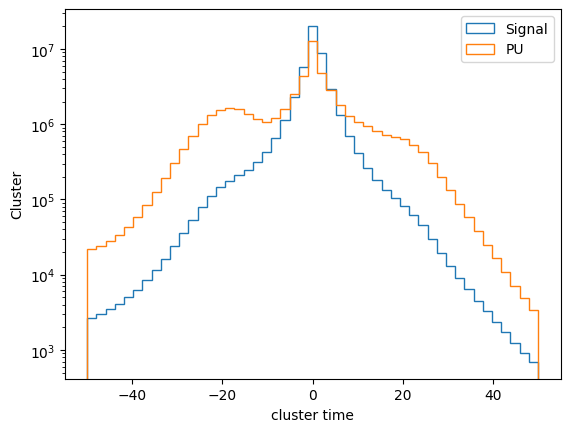

In [34]:
import matplotlib.pyplot as plt
bins = np.linspace(-50, 50, endpoint=1) 
plt.hist(signal.cluster_time.values, bins=bins, label = 'Signal', histtype='step')
plt.hist(pileup.cluster_time.values, bins=bins, label = 'PU', histtype='step')
plt.legend()
plt.yscale('log') 
plt.xlabel('cluster time') 
plt.ylabel('Cluster')